In [11]:
# libs
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
#from sklearn.metrics import mean_squared_error

In [14]:
dir='~/CMAQcheck/'

fnamesd02=['CO_d02_2018_8_EPA_CMAQ_Combine.csv',
'CO_d02_2019_1_EPA_CMAQ_Combine.csv',
'NO2_d02_2018_8_EPA_CMAQ_Combine.csv',
'NO2_d02_2019_1_EPA_CMAQ_Combine.csv',
'O3_d02_2018_8_EPA_CMAQ_Combine.csv',
'O3_d02_2019_1_EPA_CMAQ_Combine.csv',
'SO2_d02_2018_8_EPA_CMAQ_Combine.csv',
'SO2_d02_2019_1_EPA_CMAQ_Combine.csv']  

fnamesd03=['CO_d03_2018_8_EPA_CMAQ_Combine.csv',
'CO_d03_2019_1_EPA_CMAQ_Combine.csv',
'NO2_d03_2018_8_EPA_CMAQ_Combine.csv',
'NO2_d03_2019_1_EPA_CMAQ_Combine.csv',
'O3_d03_2018_8_EPA_CMAQ_Combine.csv',
'O3_d03_2019_1_EPA_CMAQ_Combine.csv',
'SO2_d03_2018_8_EPA_CMAQ_Combine.csv',
'SO2_d03_2019_1_EPA_CMAQ_Combine.csv']


In [15]:
fnamesd02=[dir+fnamesd02[i] for i in range(len(fnamesd02))]
fnamesd03=[dir+fnamesd03[i] for i in range(len(fnamesd03))]

In [16]:
no2_aug=pd.read_csv(fnamesd02[2])
no2_jan=pd.read_csv(fnamesd02[3])

/Users/anastasiamontgomery/miniconda3/envs/dataviz/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
def corr(x,y):
    x,y=np.asarray(x),np.asarray(y)
    nas = np.logical_or(np.isnan(x), np.isnan(y))
    x,y = x[~nas], y[~nas]
    corr = pearsonr(x,y)[0]
    bias = (np.array(y)-np.array(x)).mean()
    #mse = mean_squared_error(x,y)
    return corr,bias

def only_d03_corr(df,df2):
#for i in range(1):
    df['date']=pd.to_datetime(df['level_0'])
    df2['date']=pd.to_datetime(df2['level_0'])
    latlon=[str(df.Latitude[i]) + " " + str(df.Longitude[i]) for i in range(len(df))]
    latlon2=[str(df2.Latitude[i]) + " " + str(df2.Longitude[i]) for i in range(len(df2))]
    df['latlon']=latlon;
    df2['latlon']=latlon2;
    if df['Units of Measure'].unique()[0]=='Parts per million': df['Sample Measurement']=df['Sample Measurement']*1000; df2['Sample Measurement']=df2['Sample Measurement']*1000
    elif df['Units of Measure'].unique()[1]=='Parts per million': df['Sample Measurement']=df['Sample Measurement']*1000; df2['Sample Measurement']=df2['Sample Measurement']*1000
    m=pd.merge(df2,df,on=['latlon','date'],suffixes=('_d02', '_d03'))
    x,y,z = np.array(m['Sample Measurement_d02']),np.array(m['CMAQ_d02']),np.array(m['CMAQ_d03'])
    corrd02=corr(x,y)[:2]
    corrd03=corr(x,z)[:2]
    nstations=len(m.latlon.unique())
    return corrd02,corrd03,nstations,np.nanmean(x),y.mean(),z.mean()

In [30]:
for i in range(len(fnamesd02)):
    if fnamesd03[i].split(dir)[1][0:2]=='CO': print(i)
    elif fnamesd03[i].split(dir)[1][0:2]=='O3': print(i)

0
1
4
5


In [33]:
corrd02,corrd03=[],[]
biasd02,biasd03=[],[]
nstation=[]
avgstn=[];avgcmq2=[];avgcmq3=[]


for i in range(len(fnamesd02)):
    
    df,df2=pd.read_csv(fnamesd03[i]),pd.read_csv(fnamesd02[i])
    #if fnamesd03[i].split(dir)[1][0:2]=='CO': df['Sample Measurement']=df['Sample Measurement']*1000; df2['Sample Measurement']=df2['Sample Measurement']*1000
    #elif fnamesd03[i].split(dir)[1][0:2]=='O3': df['Sample Measurement']=df['Sample Measurement']*1000; df2['Sample Measurement']=df2['Sample Measurement']*1000    
        
    c2,c3,ns,xm,ym,zm = only_d03_corr(df,df2)
    
    corrd02.append(c2[0]);corrd03.append(c3[0])
    biasd02.append(c2[1]);biasd03.append(c3[1]);
    nstation.append(ns)
    avgstn.append(xm); avgcmq2.append(ym); avgcmq3.append(zm)

/Users/anastasiamontgomery/miniconda3/envs/dataviz/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
chems=['Aug CO','Jan CO','Aug NO2','Jan NO2','Aug O3','Jan O3','Aug SO2','Jan SO2']

final=pd.DataFrame([chems,corrd02,biasd02,corrd03,biasd03,avgstn,avgcmq2,avgcmq3,nstation]).T

final.columns=['chem/date','r2 d02','bias d02','r2 d03','bias d03','avg stn','avg d02','avg d03','n station']

pd.options.display.float_format = '{:,.2f}'.format
final

,chem/date,r2 d02,bias d02,r2 d03,bias d03,avg stn,avg d02,avg d03,n station
0,Aug CO,0.22,-46.24,0.24,-46.15,250.65,194.90,198.97,6
1,Jan CO,0.45,-95.70,0.46,-97.18,284.08,178.62,195.44,6
2,Aug NO2,0.58,1.12,0.59,0.21,10.24,9.14,10.70,9
3,Jan NO2,0.60,-2.37,0.61,-3.53,13.13,8.02,10.50,10
4,Aug O3,0.68,9.64,0.69,10.12,29.94,37.62,38.49,68
5,Jan O3,0.67,6.39,0.67,6.91,24.31,29.41,26.83,24
6,Aug SO2,0.03,0.87,0.12,0.91,0.50,1.33,1.41,16
7,Jan SO2,0.29,0.46,0.21,0.36,0.72,0.70,0.62,16


In [93]:
r2 = [(final['r2 d02'][i],final['r2 d03'][i]) for i in range(len(final))]
r2=np.array(r2).ravel()

bias = [(final['bias d02'][i],final['bias d03'][i]) for i in range(len(final))]
bias=np.array(bias).ravel()

avg = [(final['avg d02'][i],final['avg d03'][i]) for i in range(len(final))]
avg=np.array(avg).ravel()

data = [r2,bias,avg]

labels = [(final['chem/date'][i]+'_2',final['chem/date'][i]+'_3') for i in range(len(final))]
labels=np.array(labels).ravel()

Text(0.5, 1.0, 'd02 vs d03 performance')

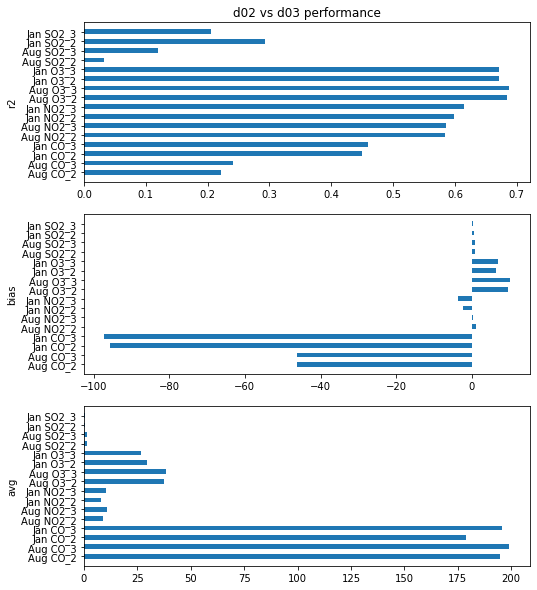

In [98]:
# make a figure that has compares biases, r2, avg values
f,ax = plt.subplots(3,1,figsize = (8,10))

width = 0.5 # the width of the bars

titles=['r2','bias','avg']

for d in range(len(data)):
    rects = ax[d].barh(np.arange(len(data[d])), data[d], width,zorder=2)
    #ax[d].set_title(titles[d])
    ax[d].set_ylabel(titles[d])
    ax[d].set_yticks(np.arange(len(data[d])))
    ax[d].set_yticklabels(labels)
    
    
# add some text for labels, title and axes ticks
ax[0].set_title('d02 vs d03 performance')

Text(0.5, 1.0, 'd02 vs d03 performance')

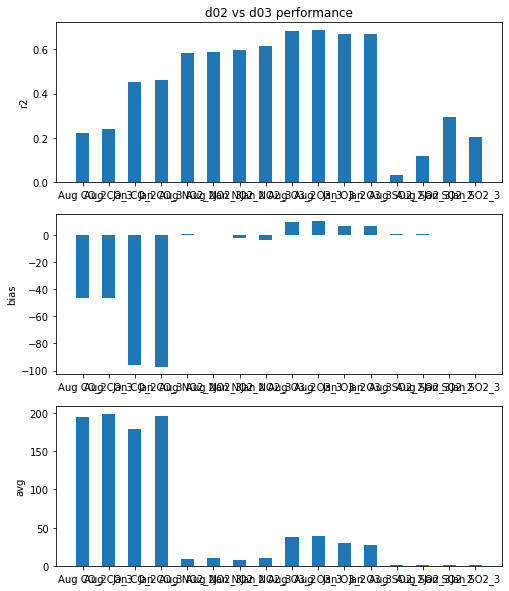

In [99]:
# make a figure that has compares biases, r2, avg values
f,ax = plt.subplots(3,1,figsize = (8,10))

width = 0.5 # the width of the bars

titles=['r2','bias','avg']

for d in range(len(data)):
    rects = ax[d].bar(np.arange(len(data[d])), data[d], width,zorder=2)
    #ax[d].set_title(titles[d])
    ax[d].set_ylabel(titles[d])
    ax[d].set_xticks(np.arange(len(data[d])))
    ax[d].set_xticklabels(labels)
    
    
# add some text for labels, title and axes ticks
ax[0].set_title('d02 vs d03 performance')

Text(0.24040462487234288, -46.1495434896532, '')

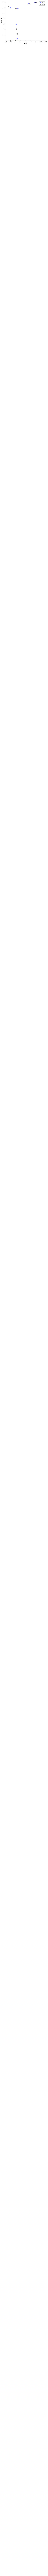

In [124]:
fig,ax=plt.subplots(figsize=(6,6))
plt.scatter(final['bias d02'],final['r2 d02'],s=100,c='blue',alpha=0.5,label='d02')
plt.scatter(final['bias d03'],final['r2 d03'],s=100,c='black',alpha=0.5,label='d03')
plt.xlabel('Bias')
plt.ylabel('Correlation')
plt.xlim([-5,15])
plt.legend()

a1,a2=final['bias d02'][0],final['bias d03'][0]
b1,b2=final['r2 d02'][0],final['r2 d03'][0]
ax.annotate("", xy=(b1,a1), xytext=(b2,a2),
           arrowprops=dict(arrowstyle="->"))


# CHANGES ---
# > Make markers text .... O3_D02 .... 
# > color points by season

In [ ]:
no2_aug=pd.read_csv(fnamesd02[2])
no2_jan=pd.read_csv(fnamesd02[3])

In [49]:
# Find 95ile values
no2_aug['date']=pd.to_datetime(no2_aug['level_0'])
df = no2_aug.set_index('date').sort_index()

<AxesSubplot:xlabel='Sample Measurement', ylabel='CMAQ'>

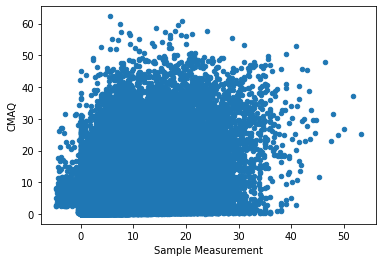

In [52]:
df.plot.scatter('Sample Measurement','CMAQ')